In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


2.7.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_images)

10000

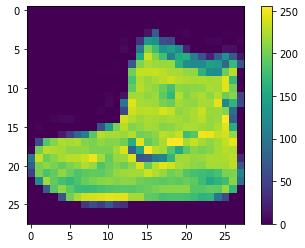

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

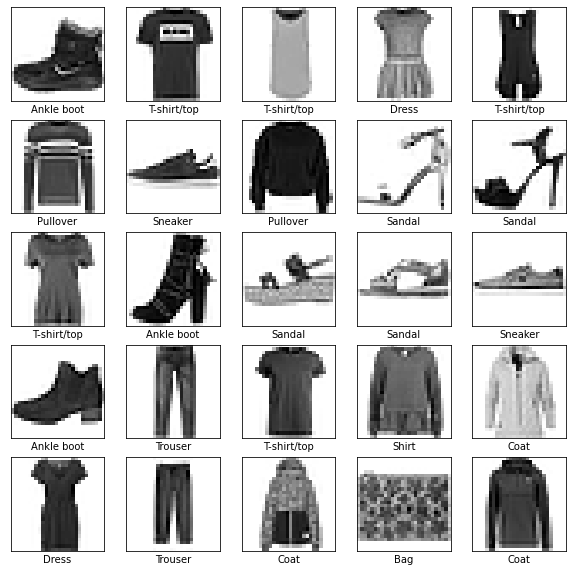

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])


In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4958 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3806 - accuracy: 0.8620
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3367 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3116 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2931 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2801 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2658 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2561 - accuracy: 0.9046: 0s - loss: 0.2547 - 
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2452 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 2s 

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy: ", test_acc)

313/313 - 1s - loss: 0.3434 - accuracy: 0.8794 - 780ms/epoch - 2ms/step

Test accuracy:  0.8794000148773193


In [17]:
probability_model= tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([1.0537742e-06, 1.2340999e-10, 1.5687620e-09, 1.1372124e-09,
       5.6146007e-07, 2.0805062e-03, 2.8279205e-08, 2.0567857e-02,
       4.4948036e-09, 9.7735006e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


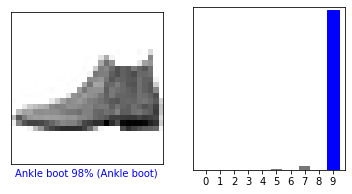

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


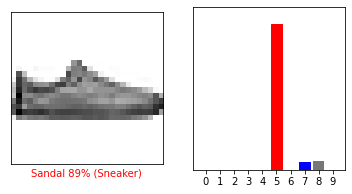

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


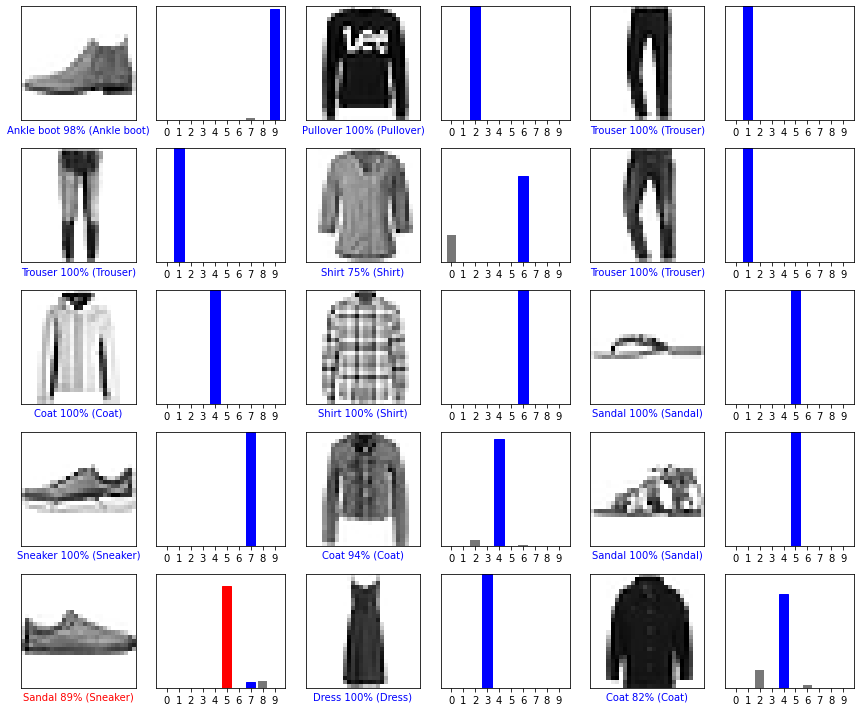

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [25]:
img = test_images[1]
print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[9.2681803e-05 1.8084086e-14 9.9971527e-01 7.1394202e-10 1.3164188e-04
  2.9259279e-11 6.0450679e-05 2.5816883e-19 5.9046140e-10 7.8987511e-16]]


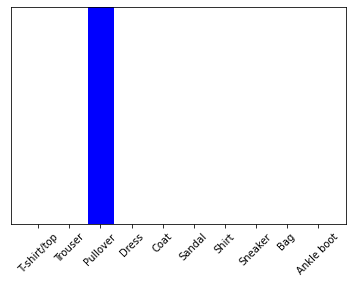

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [29]:
np.argmax(predictions_single[0])

2

In [30]:
img = test_images[3]
print(img.shape)

(28, 28)


In [31]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[3.2930057e-08 9.9999797e-01 1.7017341e-09 1.8699120e-06 3.5861516e-09
  1.1516582e-15 3.4620108e-08 3.8028918e-19 5.4968092e-12 2.0849136e-12]]


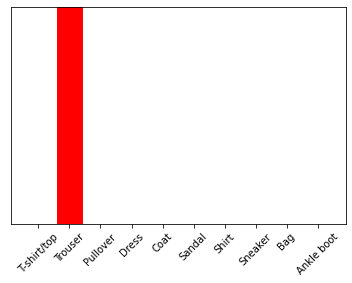

In [33]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [34]:
np.argmax(predictions_single[0])

1